Jerónimo Aranda Barois 150344 a 20 de agosto de 2019
# Estadística Aplicada 3: Índice de marginación
## Análisis exploratorio

Primero importamos los paquetes más importantes:

In [93]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import linear_model
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 10)

Nos aseguramos que el archivo de datos se encuentre en el mismo directorio en el que este notebook se encuentra:

In [4]:
os.listdir()

['indice_marginacion.csv', 'marginacion.ipynb', '.ipynb_checkpoints']

Procedemos a leer el archivo csv de datos y a visualizar sus primeros 5 elementos junto con algunas de sus columnas. 

In [50]:
df=pd.read_csv('indice_marginacion.csv')
df.head()

,CVE_ENT,ENT,CVE_MUN,MUN,POB_TOT,VP,ANALF,SPRIM,OVSDE,OVSEE,...,PL<5000,PO2SM,OVSD,OVSDSE,IM,GM,IND0A100,LUG_NAC,LUGAR_EST,A—O
0,1,Aguascalientes,1001,Aguascalientes,877190,-,2.06,9.54,0.31,0.16,...,8.73,31.13,-,-,-1.676,Muy bajo,-,2408,11,2015
1,1,Aguascalientes,1005,Jes˙s MarÌa,120405,-,3.26,13.73,0.44,0.37,...,45.17,33.77,-,-,-1.256,Muy bajo,-,2229,10,2015
2,1,Aguascalientes,1003,Calvillo,56048,-,4.8,24.18,0.55,0.41,...,50.76,61.95,-,-,-0.698,Bajo,-,1799,5,2015
3,1,Aguascalientes,1007,RincÛn de Romos,53866,-,3.53,14.75,1.97,0.52,...,43.06,43.44,-,-,-1.045,Bajo,-,2090,7,2015
4,1,Aguascalientes,1006,PabellÛn de Arteaga,46473,-,3.41,14.9,1,0.42,...,31.6,41.48,-,-,-1.129,Muy bajo,-,2153,8,2015


Podemos ver que tiene valores vacíos definidos por un guión además de valores 'N. D.', procedemos a marcarlos para que python los reconozca como valores faltantes.

In [121]:
missing_values = ["-",'N. D.']
df = pd.read_csv("indice_marginacion.csv", na_values = missing_values)
df.head()

,CVE_ENT,ENT,CVE_MUN,MUN,POB_TOT,VP,ANALF,SPRIM,OVSDE,OVSEE,...,PL<5000,PO2SM,OVSD,OVSDSE,IM,GM,IND0A100,LUG_NAC,LUGAR_EST,A—O
0,1.0,Aguascalientes,1001.0,Aguascalientes,877190,NaN,2.06,9.54,0.31,0.16,...,8.73,31.13,NaN,NaN,-1.676,Muy bajo,NaN,2408.0,11.0,2015
1,1.0,Aguascalientes,1005.0,Jes˙s MarÌa,120405,NaN,3.26,13.73,0.44,0.37,...,45.17,33.77,NaN,NaN,-1.256,Muy bajo,NaN,2229.0,10.0,2015
2,1.0,Aguascalientes,1003.0,Calvillo,56048,NaN,4.80,24.18,0.55,0.41,...,50.76,61.95,NaN,NaN,-0.698,Bajo,NaN,1799.0,5.0,2015
3,1.0,Aguascalientes,1007.0,RincÛn de Romos,53866,NaN,3.53,14.75,1.97,0.52,...,43.06,43.44,NaN,NaN,-1.045,Bajo,NaN,2090.0,7.0,2015
4,1.0,Aguascalientes,1006.0,PabellÛn de Arteaga,46473,NaN,3.41,14.90,1.00,0.42,...,31.60,41.48,NaN,NaN,-1.129,Muy bajo,NaN,2153.0,8.0,2015


A continuación veremos los últimos 5 elementos del data frame, parece que están ordenados por entidad.

In [135]:
df.tail()

,CVE_ENT,ENT,CVE_MUN,MUN,POB_TOT,VP,ANALF,SPRIM,OVSDE,OVSEE,...,PL<5000,PO2SM,OVSD,OVSDSE,IM,GM,IND0A100,LUG_NAC,LUGAR_EST,A—O
14640,32.0,Zacatecas,32028.0,Mezquital del Oro,3519,NaN,13.88,60.20,65.51,34.90,...,100.0,71.14,NaN,NaN,0.199,Alto,NaN,1033.0,9.0,1990
14641,32.0,Zacatecas,32030.0,Momax,3486,NaN,10.38,57.04,41.38,12.99,...,100.0,65.91,NaN,NaN,-0.690,Bajo,NaN,1755.0,41.0,1990
14642,32.0,Zacatecas,32041.0,El Salvador ...,3353,NaN,23.63,67.41,55.79,27.96,...,100.0,88.45,NaN,NaN,0.219,Alto,NaN,1013.0,7.0,1990
14643,32.0,Zacatecas,32015.0,General JoaquÌn Amaro,3242,NaN,11.95,65.96,78.22,11.35,...,100.0,84.60,NaN,NaN,0.077,Alto,NaN,1130.0,11.0,1990
14644,32.0,Zacatecas,32043.0,Susticac·n,1632,NaN,15.54,70.08,52.14,16.67,...,100.0,76.58,NaN,NaN,-0.050,Medio,NaN,1234.0,14.0,1990


Ahora averigüemos la cantidad de registros y columnas que el data frame posee:

In [136]:
df.shape

(14645, 23)

Es decir posee 14645 registros y de cada uno hay 23 columnas diferentes. Procedamos a ver el nombre de las 23 columnas:

In [137]:
df.columns

Index(['CVE_ENT', 'ENT', 'CVE_MUN', 'MUN', 'POB_TOT', 'VP', 'ANALF', 'SPRIM',
       'OVSDE', 'OVSEE', 'OVSAE', 'VHAC', 'OVPT', 'PL<5000', 'PO2SM', 'OVSD',
       'OVSDSE', 'IM', 'GM', 'IND0A100', 'LUG_NAC', 'LUGAR_EST', 'A—O'],
      dtype='object')

En la siguiente línea podemos ver los tipos de las variables en cada columna.

In [18]:
df.dtypes

CVE_ENT      float64
ENT           object
CVE_MUN      float64
MUN           object
POB_TOT        int64
VP           float64
ANALF        float64
SPRIM        float64
OVSDE        float64
OVSEE        float64
OVSAE        float64
VHAC         float64
OVPT         float64
PL<5000      float64
PO2SM        float64
OVSD         float64
OVSDSE        object
IM           float64
GM            object
IND0A100     float64
LUG_NAC      float64
LUGAR_EST    float64
A—O            int64
dtype: object

Veamos un resumen del dataset:

In [56]:
df.describe()

,CVE_ENT,CVE_MUN,POB_TOT,VP,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL<5000,PO2SM,OVSD,IM,IND0A100,LUG_NAC,LUGAR_EST,A—O
count,14641.000000,14641.000000,1.464500e+04,2428.000000,14644.000000,12216.000000,9773.000000,14644.000000,14644.000000,12216.000000,12216.000000,12217.000000,12216.000000,2428.000000,14640.000000,2456.000000,14640.000000,9756.000000,14645.000000
mean,19.263780,19372.796803,7.085493e+04,7978.031713,17.347499,41.216646,15.857574,9.813005,19.794272,50.864100,23.662399,73.617492,66.767279,55.235362,-0.000002,27.672488,1220.577117,109.050123,2002.563674
std,7.325014,7340.605482,1.796173e+06,24809.881403,12.249536,17.253803,21.357330,15.035423,21.582845,16.312419,23.694976,34.304025,18.702012,30.331445,0.999862,11.299628,704.524229,132.926192,8.527443
min,1.000000,1001.000000,8.700000e+01,38.000000,0.560000,2.490000,0.000000,0.000000,0.000000,7.280000,0.000000,0.000000,6.400000,0.050000,-2.678000,1.211000,1.000000,1.000000,1990.000000
25%,14.000000,14086.000000,4.041000e+03,772.750000,8.037500,28.650000,1.840000,1.480000,3.460000,38.280000,5.537500,44.860000,54.020000,28.695000,-0.761000,19.079500,610.750000,23.000000,1995.000000
50%,20.000000,20231.000000,1.195800e+04,2240.500000,14.520000,40.245000,5.650000,3.850000,11.060000,50.045000,14.930000,100.000000,69.015000,56.505000,-0.040000,27.327500,1220.500000,56.000000,2005.000000
75%,24.000000,24028.000000,2.941600e+04,5586.750000,23.460000,52.790000,21.060000,10.730000,29.910000,63.270000,34.525000,100.000000,82.210000,83.145000,0.677250,35.338000,1830.250000,130.000000,2010.000000
max,32.000000,32058.000000,1.195308e+08,369633.000000,86.070000,98.550000,99.640000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,5.027000,76.975000,2457.000000,570.000000,2015.000000


A continuación se hace una gráfica de todas las observaciones de la población por municipios por estado.

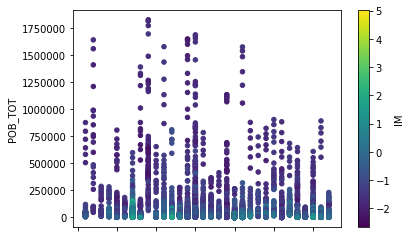

In [84]:
df.plot.scatter(x='CVE_ENT',y='POB_TOT',c='IM',colormap='viridis')

Se alcanza a ver un poco la distribución de la población en cada uno de los estados. Además que el indice de marginación es más alto en los municipios que tienen poblaciones más pequeñas.

## Muestra de 600 observaciones.

En esta parte obtendremos una muestra de 600 observaciones:

In [105]:
df_sample=df.sample(n=600,random_state=42)
print(df_sample.shape)
df_sample.head()

(600, 23)


,CVE_ENT,ENT,CVE_MUN,MUN,POB_TOT,VP,ANALF,SPRIM,OVSDE,OVSEE,...,PL<5000,PO2SM,OVSD,OVSDSE,IM,GM,IND0A100,LUG_NAC,LUGAR_EST,A—O
4965,5.0,Coahuila de Zaragoza,5031.0,San Buenaventura,19620,NaN,3.05,13.87,0.44,0.73,...,8.51,40.02,NaN,NaN,-1.682,Muy bajo,NaN,2378.0,31.0,2005
12450,8.0,Chihuahua,8055.0,Rosales,14154,NaN,7.38,46.88,19.55,10.11,...,100.00,71.01,NaN,NaN,-0.909,Bajo,NaN,1919.0,34.0,1990
6363,20.0,Oaxaca,20241.0,San MartÌn Lachil·,979,NaN,26.94,46.85,0.00,0.41,...,100.00,80.45,NaN,NaN,0.307,Alto,NaN,900.0,364.0,2005
8882,20.0,Oaxaca,20416.0,Santa MarÌa Ixcatl·n,594,NaN,27.1,53.07,NaN,9.09,...,100.00,92.88,NaN,7.24,0.679,Alto,NaN,621.0,264.0,2000
8294,18.0,Nayarit,18008.0,Xalisco,37664,NaN,6.78,27.43,NaN,1.98,...,37.03,53.79,NaN,3.24,-1.292,Muy bajo,NaN,2204.0,18.0,2000


Y con ella haremos una grafica de caja y brazos para algunas variables:

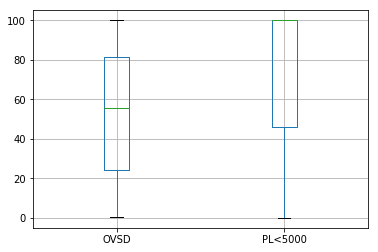

In [139]:
df_sample.boxplot(column=['OVSD','PL<5000'])

## Mejores 3 modelos líneales

Para elegir nuestro mejor modelo líneal primero elijamos las variables cuya correlación de Pearson es más alta con con el índice de marginación y visualícemoslos en un gráfico.

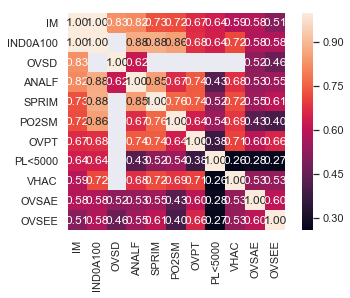

In [34]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(11, 'IM').index
correlation_map=correlation[columns].loc[columns]
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

Como la correlación es mayor entre el índice de marginación y las variables ovsd, analf y sprim hagamos los 3 modelos lineales.

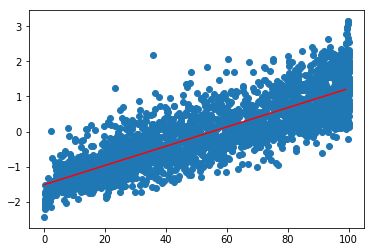

In [9]:
plt.scatter(x=df['OVSD'],y=df['IM'])
df1=df[['OVSD','IM']].dropna()
X=np.array([df1['OVSD']])
y=df1['IM'].values
lm = linear_model.LinearRegression()
model = lm.fit(X.T,y)
x=range(100)
Y=model.predict(np.array([x]).T)

plt.plot(x,Y,color='red')

cuya R^2 es:

In [10]:
print(lm.score(X.T,y))

0.6910993101399279


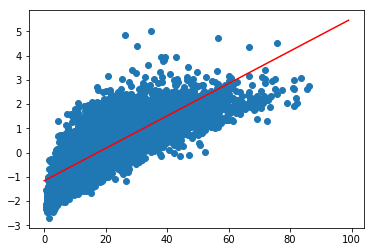

In [11]:
plt.scatter(x=df['ANALF'],y=df['IM'])
df1=df[['ANALF','IM']].dropna()
X=np.array([df1['ANALF']])
y=df1['IM'].values
lm = linear_model.LinearRegression()
model = lm.fit(X.T,y)
x=range(100)
Y=model.predict(np.array([x]).T)

plt.plot(x,Y,color='red')

cuya R^2 es:

In [13]:
print(lm.score(X.T,y))

0.6704117180641818


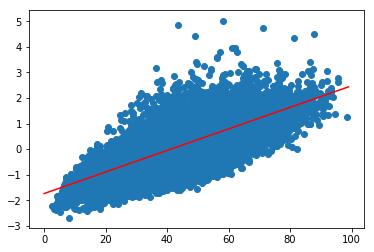

In [16]:
plt.scatter(x=df['SPRIM'],y=df['IM'])
df1=df[['SPRIM','IM']].dropna()
X=np.array([df1['SPRIM']])
y=df1['IM'].values
lm = linear_model.LinearRegression()
model = lm.fit(X.T,y)
x=range(100)
Y=model.predict(np.array([x]).T)

plt.plot(x,Y,color='red')

cuya R^2 es:

In [15]:
print(lm.score(X.T,y))

0.6704117180641818


Si nuestro criterio es la R^2 entonces nuestro mejor modelo sería el primero, es decir el que explica al índice de marginación a partir del porcentaje de ocupantes en viviendas sin drenaje ni escusado.

# Analisis en componentes principales

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [160]:
featureso=[]
for col in df.columns:
    if not df[col].dtypes == 'object':
        print(col)
        featureso.append(col)

CVE_ENT
CVE_MUN
POB_TOT
VP
ANALF
SPRIM
OVSDE
OVSEE
OVSAE
VHAC
OVPT
PL<5000
PO2SM
OVSD
IM
IND0A100
LUG_NAC
LUGAR_EST
A—O


In [182]:
features=featureso[4:4+9]
print(features)
x=df[features].dropna()
x.head()

['ANALF', 'SPRIM', 'OVSDE', 'OVSEE', 'OVSAE', 'VHAC', 'OVPT', 'PL<5000', 'PO2SM']


,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL<5000,PO2SM
0,2.06,9.54,0.31,0.16,0.72,18.01,0.63,8.73,31.13
1,3.26,13.73,0.44,0.37,0.73,27.02,1.03,45.17,33.77
2,4.80,24.18,0.55,0.41,0.86,30.53,0.93,50.76,61.95
3,3.53,14.75,1.97,0.52,1.52,31.61,0.91,43.06,43.44
4,3.41,14.90,1.00,0.42,0.90,32.24,0.62,31.60,41.48


In [188]:
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
principalDf['IM']=x[:,-1]

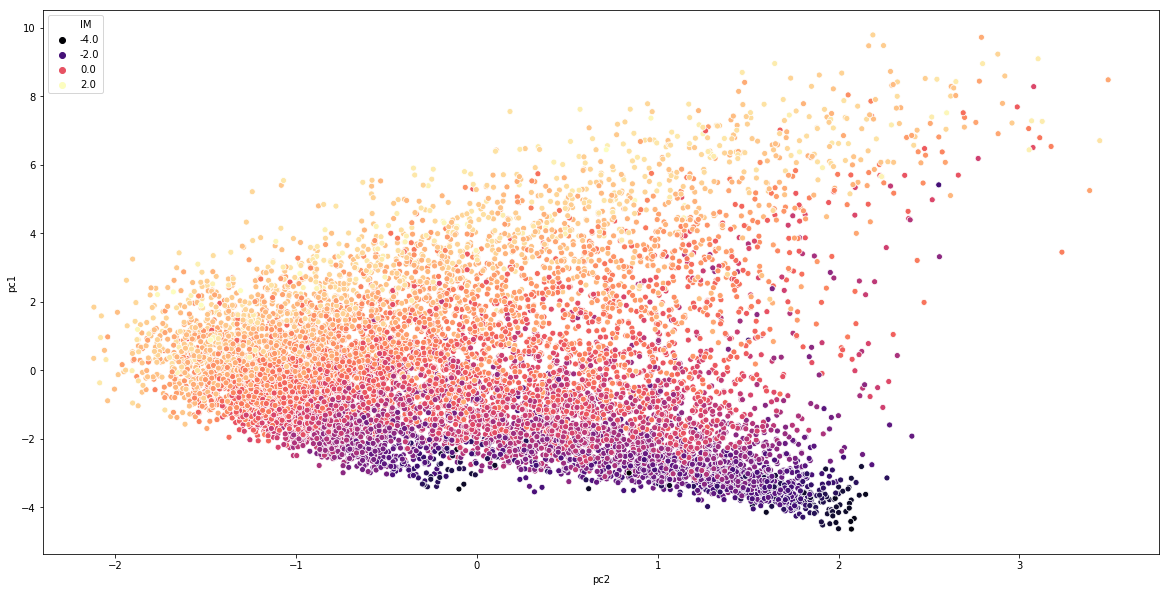

In [189]:
sns.scatterplot(x='pc2',y='pc1',hue='IM',palette='magma',data=principalDf)